In [2]:
import pandas as pd

In [3]:
airplane_crash = pd.read_csv('/Airplane_Crashes_and_Fatalities_Since_1908.csv')
airplane_crash.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
airplane_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [5]:
airplane_crash.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [6]:
airplane_crash.isnull().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


In [7]:
airplane_crash.dtypes

,0
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Type,object
Registration,object
cn/In,object
Aboard,float64


In [8]:
airplane_crash.apply(lambda x: len(x.unique()))

,0
Date,4753
Time,1006
Location,4304
Operator,2477
Flight #,725
Route,3244
Type,2447
Registration,4906
cn/In,3708
Aboard,240


In [9]:
airplane_crash.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Date,5268,4753,09/11/2001,4
Time,3049,1005,15:00,32
Location,5248,4303,"Moscow, Russia",15
Operator,5250,2476,Aeroflot,179
Flight #,1069,724,-,67
Route,3561,3243,Training,81
Type,5241,2446,Douglas DC-3,334
Registration,4933,4905,49,3
cn/In,4040,3707,178,6
Summary,4878,4673,Crashed during takeoff.,15


In [10]:
accident_by_location = airplane_crash['Location'].value_counts().reset_index()
accident_by_location.columns=['Location','Count']
top_20_location = accident_by_location.head(20)
top_20_location

,Location,Count
0,"Moscow, Russia",15
1,"Sao Paulo, Brazil",15
2,"Rio de Janeiro, Brazil",14
3,"Bogota, Colombia",13
4,"Manila, Philippines",13
5,"Anchorage, Alaska",13
6,"New York, New York",12
7,"Cairo, Egypt",12
8,"Chicago, Illinois",11
9,AtlantiOcean,9


In [11]:
accident_by_date = airplane_crash['Date'].value_counts().reset_index()
accident_by_date.columns=['Date','Count']
accident_by_date.head(20)

,Date,Count
0,09/11/2001,4
1,08/31/1988,4
2,08/27/1992,4
3,02/28/1973,4
4,06/18/1972,4
5,08/28/1976,4
6,11/15/1934,3
7,09/02/1958,3
8,09/17/1929,3
9,01/06/1974,3


In [12]:
accident_by_date_and_location = airplane_crash.groupby(['Date','Location']).size().reset_index()
accident_by_date_and_location.columns=['Date','Location', 'Count']
accident_by_date_and_location.head(20)

,Date,Location,Count
0,01/01/1966,"Near Palembang, Sumarta, Indonesia",1
1,01/01/1970,"Nulato, Alaska",1
2,01/01/1974,"Near Turin, Italy",1
3,01/01/1976,"Near Al Qaysumah, Saudi Arabia",1
4,01/01/1978,"Off Bandra, Maharashtra, India",1
5,01/01/1985,"Near La Paz, Bolivia",1
6,01/01/2002,"Hollywood, Florida",1
7,01/01/2007,"Off Parepare, Indonesia",1
8,01/02/1949,"Seattle, Washington",1
9,01/02/1952,"Andapa, Madagascar",1


In [13]:
accident_types_by_location = airplane_crash.groupby(['Type','Location']).size().reset_index()
accident_types_by_location.columns=['Type','Location','Count']
accident_types_by_location.head(10)

,Type,Location,Count
0,AAC-1 Toucan,"St Leger-la-Montagne, France",1
1,AEGK,"Frankfurt, Germany",1
2,AT L98 Carvair,"Karachi, Pakistan",1
3,ATR 42-300,"Paranapanema, Sao Paulo, Brazil",1
4,ATR-42-300,"Merida, Venezuela",1
5,ATR-72-202,"Off Palermo, Italy",1
6,ATR-72-212,"Roselawn, Indiana",1
7,Aermacchi MB-339PAN (3 aircraft),"Kaiserslautern, West Germany",1
8,Aero Commander 520,"Skilak Lake, Alaska",1
9,Aero Commander 500-B,"Mahaffey, Pennsylvania",1


In [14]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

fig = px.choropleth(top_20_location , locations='Location',locationmode="country names",hover_name='Location'
,color_continuous_scale="Gray",color='Count',projection='van der grinten',title='Accident count by location')
fig.show()

In [15]:
operator_counts = airplane_crash['Operator'].value_counts().reset_index()
operator_counts.columns=['Operator','Count']
operator_counts.head(10)

,Operator,Count
0,Aeroflot,179
1,Military - U.S. Air Force,176
2,Air France,70
3,Deutsche Lufthansa,65
4,Air Taxi,44
5,United Air Lines,44
6,China National Aviation Corporation,44
7,Military - U.S. Army Air Forces,43
8,Pan American World Airways,41
9,American Airlines,36


In [16]:
import matplotlib.pyplot as plt

In [17]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
operator_counts['Count'] = operator_counts['Count'].astype('int')
fig = px.bar(operator_counts.head(25),x='Operator',y='Count',template ='plotly_white')
fig.update_traces(marker_color='lightblue')
fig.update_layout(title = 'Top 25 Operators with the most accident')
fig.show()

In [18]:
aircraft = airplane_crash.groupby(['Type','Registration']).size().reset_index()
aircraft.columns = ['Aircraft Type','Registration','Accidents']
aircraft = aircraft.sort_values('Accidents',ascending = False)
aircraft.reset_index(inplace=True, drop=True)
aircraft.head(20)

,Aircraft Type,Registration,Accidents
0,Lockheed 14 Electra,CF-TCL,2
1,de Havilland DH-86,VH-USG,2
2,Ilyushin IL-76MD,CCCP-76569,1
3,Ilyushin IL-76M,CCCP-86739,1
4,Ilyushin IL-76 / Mi-8 (helicopter),CCCP-86732,1
5,Ilyushin IL-76,RA-76588,1
6,Ilyushin IL-62MK,DDR-SEW,1
7,Ilyushin IL-62M,SP-LBG,1
8,Ilyushin IL-62M,CU-T1281,1
9,Ilyushin IL-62M,CCCP-86614,1


In [19]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
fig = px.bar(aircraft,x='Aircraft Type',y = 'Accidents',template = 'plotly_white')
fig.update_traces(marker_color='#6c757d')
fig.update_layout(title = "Top 20 Aircraft type accident count",title_x = 0.5)
fig.show()

In [20]:
fatality = airplane_crash['Aboard'].corr(airplane_crash['Fatalities'])
ground = airplane_crash['Aboard'].corr(airplane_crash['Ground'])
print(fatality) , print(ground)

0.7571721575853204
0.023240847766568692


(None, None)

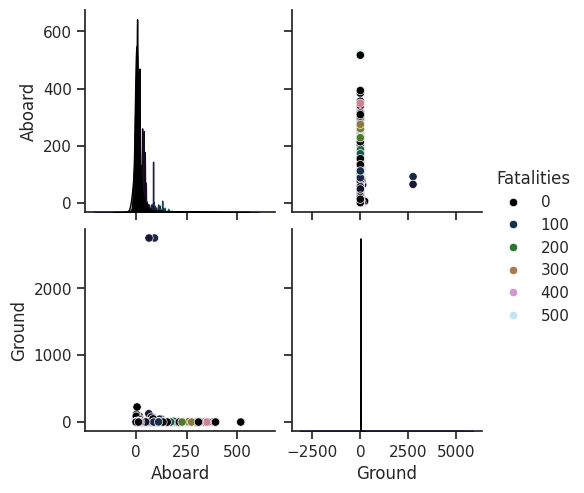

In [21]:
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set(style="ticks",color_codes=True)
sns.pairplot(data=airplane_crash,diag_kind='kde',hue="Fatalities",palette="cubehelix")
plt.show()

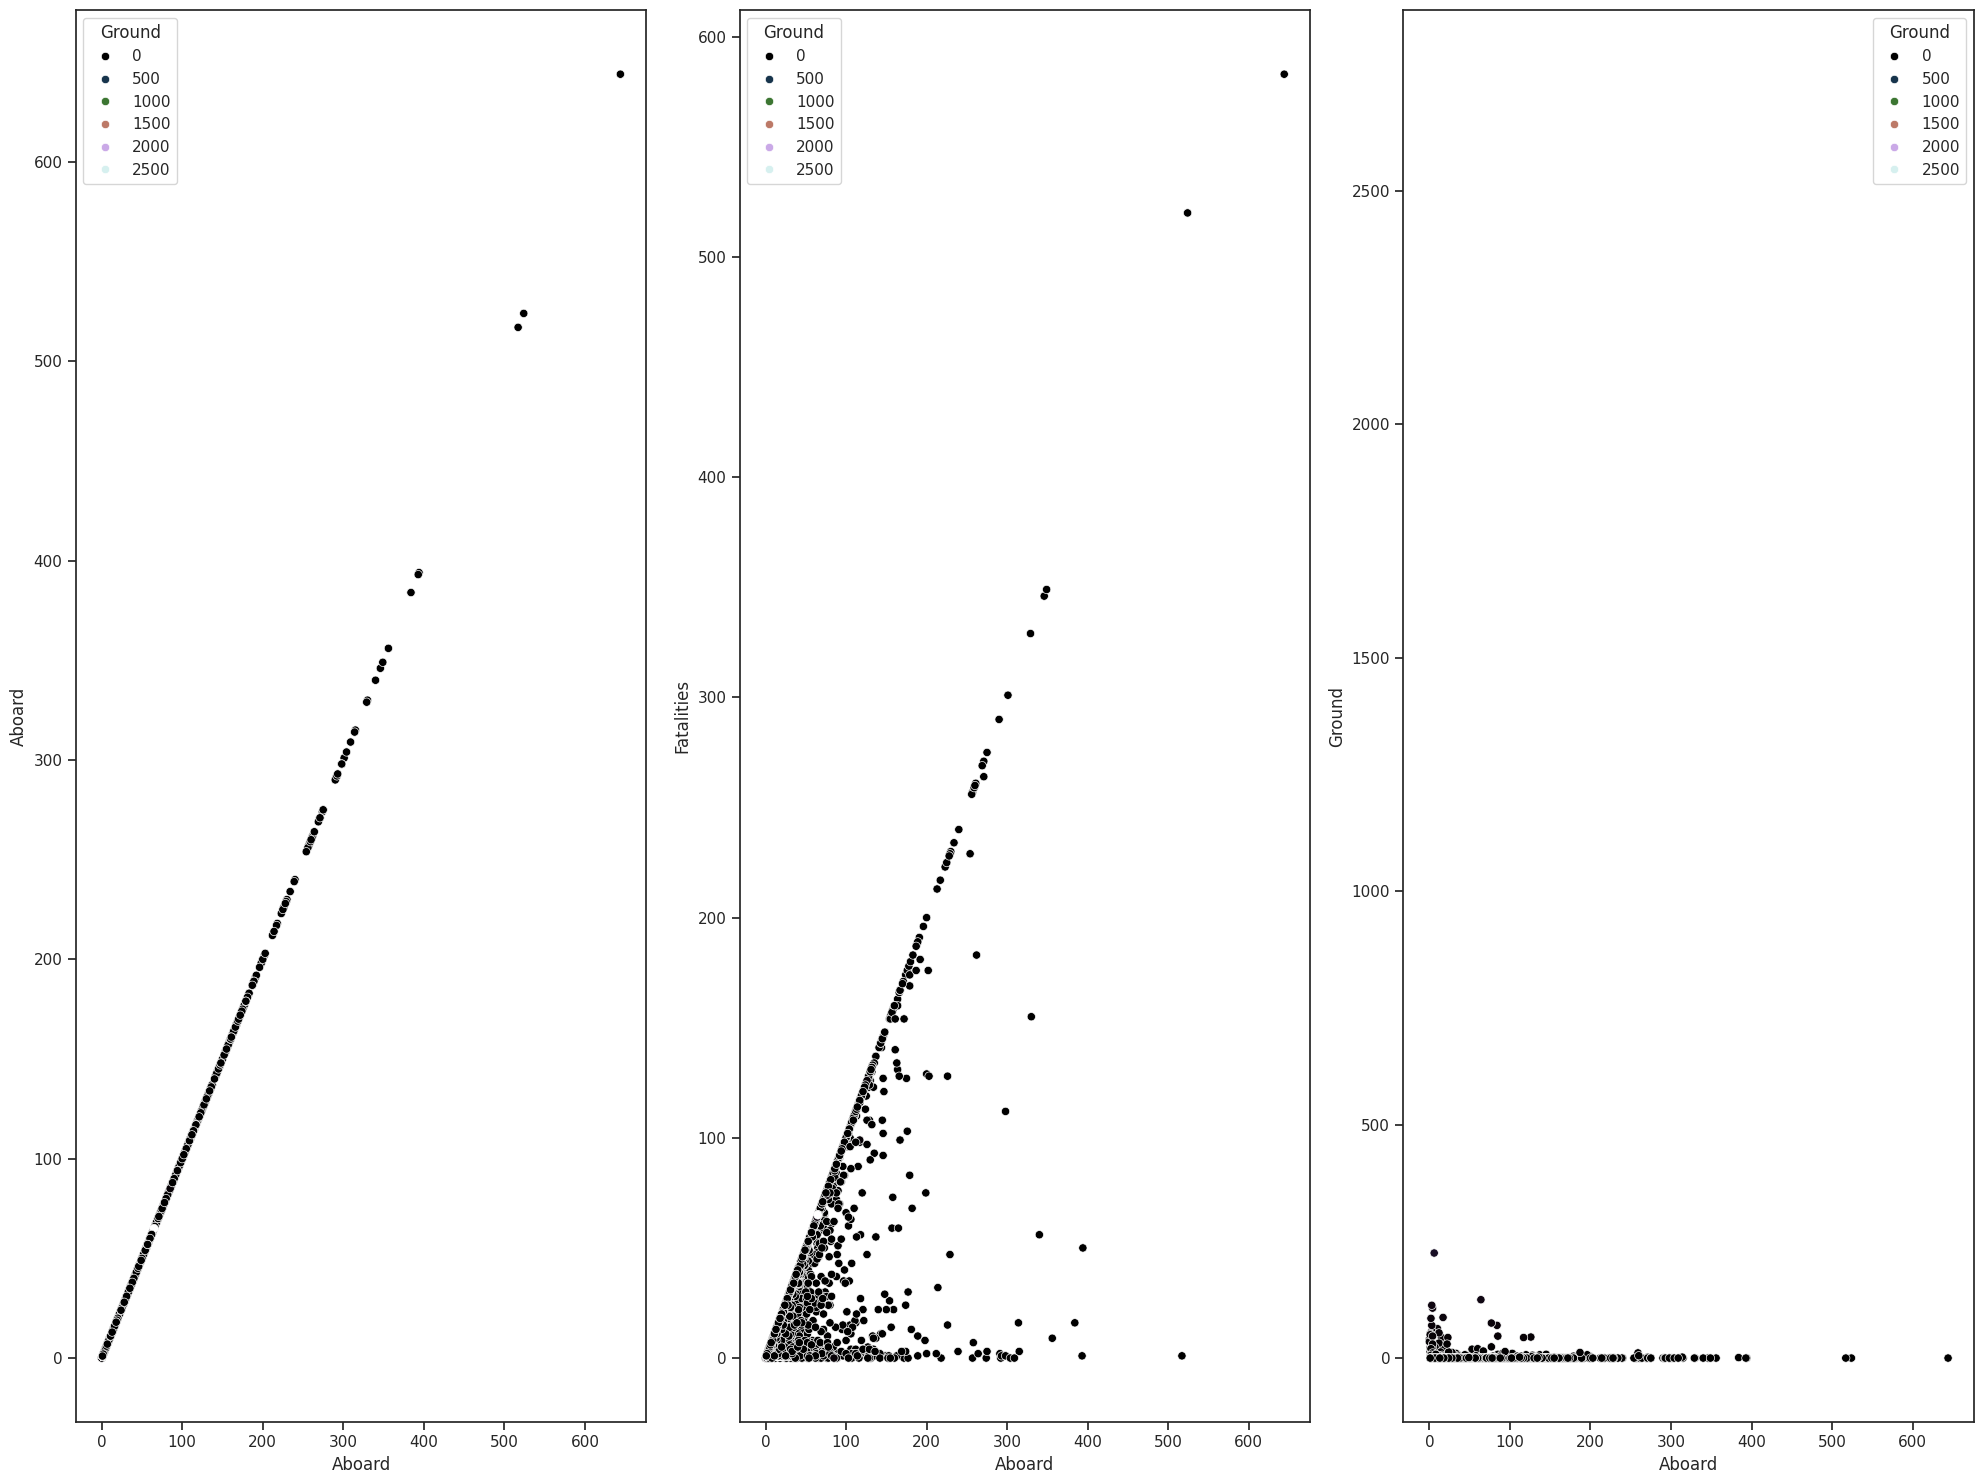

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks",color_codes=True)
fr = ['Aboard','Fatalities','Ground']
fig = plt.figure(figsize=(20,15))
for i ,col in enumerate(fr):
  ax = fig.add_subplot(1,3,i+1)
  sns.scatterplot(x='Aboard',y=col,hue='Ground',data=airplane_crash,palette="cubehelix")
plt.tight_layout()
plt.show()

In [25]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
color_scale = ["#495057", "#adb5bd", "#ced4da", "#343a40"]
airplane_crash['Year'] = pd.to_datetime(airplane_crash['Date']).dt.year
fig = px.scatter_3d(airplane_crash,x ='Fatalities',y='Ground',z='Aboard',color='Year',color_continuous_scale=color_scale,title='Distribution of kills',template='plotly_white')
fig.update_traces(marker=dict(size=10))
fig.show()

In [27]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
fig = px.histogram(airplane_crash,x='Type',template='plotly_white'
,title='Accidents by Aircraft Type',color_discrete_sequence=px.colors.sequential.gray)
fig.show()

In [30]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
airplane_crash['Aboard'].fillna(airplane_crash['Aboard'].mean(), inplace=True)
fig = px.scatter(airplane_crash,x='Year',y='Fatalities',size='Aboard',color='Type',hover_name='Location',
                 title='Year VS Fatalities VS people Aboard',
                 template='plotly_white',color_discrete_sequence=px.colors.sequential.Greys)
fig.show()

In [32]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
airplane_crash['Month'] = pd.to_datetime(airplane_crash['Date']).dt.month
z = airplane_crash[['Aboard','Fatalities','Ground','Year','Month']].corr()
fig = px.imshow(z,text_auto=True,template='plotly_white',aspect="auto",color_continuous_scale='Greys')
fig.update_layout(title='Correlation Matrix')
fig.show()